**Контрольная работа №9. Вариант 1**

Загрузка необходимых библиотек:

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from sympy import *

**1.	Матрица линейного оператора поворота векторов на плоскости вокруг начала координат на угол $α$ в базисе $(i, j)$ имеет вид $A = \begin{pmatrix}
cos α & -sin α \\
sin α & cos α
\end{pmatrix}$. Найти образ вектора $x = (2; -2)$, если $α = \frac{π}{6}$. Сделать рисунок.**

In [79]:
alpha = np.pi/6
X = np.array([[2], [-2]])
A = np.array ([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])

X_obraz = np.dot(A, X)
print("Образ вектора X:")
pprint(X_obraz)

Образ вектора X:
 [[ 2.73205081]
 [-0.73205081]]


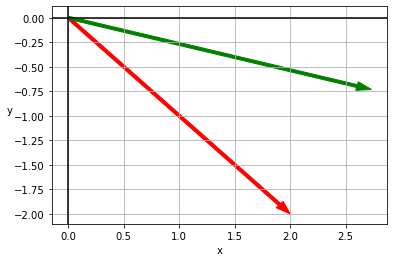

In [82]:
e1 = [2, -2]
e1_n = [2.73205081, -0.73205081]

plt.arrow(0, 0, e1[0], e1[1], width=0.03, color='r', length_includes_head=True)
plt.arrow(0, 0, e1_n[0], e1_n[1], width=0.03, color='g', length_includes_head=True)

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

**2.	Проверьте свойства линейного оператора поворота, используя данные из условия задания 1 (для $λ =$ $–2$).**

In [90]:
lam = -2
Y = X*3

print(A*(lam*X)==lam*(A*X))
print(lam*(X+Y)==lam*X+lam*Y)

[[ True  True]
 [ True  True]]
[[ True]
 [ True]]


**3.	Заданы векторы   в некотором базисе. Проверить, что векторы $e₁, e₂, e₃$ составляют базис. Применяя процесс ортогонализации построить новый ортогональный базис.**

$e₁ = (1, -1, 5), e₂ = (2, 1, 1), e₃ = (3, 0, 4).$

In [4]:
e1 = np.array([1, -1, 5])
e2 = np.array([2, 1, 1])
e3 = np.array([3, 0, 4])

A = np.matrix([e1, e2, e3])
print(np.linalg.det(A)!=0)

True


*Определитель матрицы не равен нулю, следовательно, вектора являются базисными.*

In [15]:
F = [Matrix(e1), Matrix(e2), Matrix(e3)]
print("Новый базис:")
print(*GramSchmidt(F))

Новый базис:
Matrix([[1], [-1], [5]]) Matrix([[16/9], [11/9], [-1/9]]) Matrix([[2/7], [-3/7], [-1/7]])


In [29]:
e1_n = [1, -1, 5]
e2_n = [16/9, 11/9, -1/9]
e3_n = [2/7, -3/7, -1/7]

print(np.isclose(np.dot(e1_n, e2_n), 0))
print(np.isclose(np.dot(e1_n, e3_n), 0))
print(np.isclose(np.dot(e2_n, e3_n), 0))

True
True
True


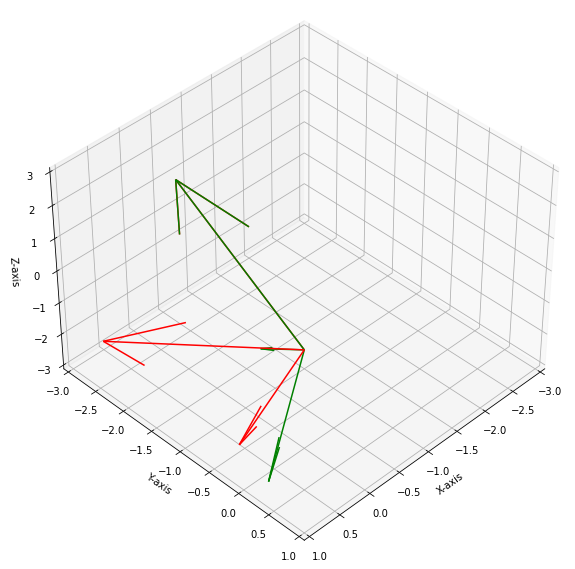

In [30]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.set_xlabel("X-axis")
ax.set_xlim(-3, 1)
ax.set_ylabel("Y-axis")
ax.set_ylim(-3, 1)
ax.set_zlabel("Z-axis")
ax.set_zlim(-3, 3)
ax.view_init(40, 45)

ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color="red")
ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color="red")
ax.quiver(0, 0, 0, e3[0], e3[1], e3[2], color="red")

ax.quiver(0, 0, 0, e1_n[0], e1_n[1], e1_n[2], color="green")
ax.quiver(0, 0, 0, e2_n[0], e2_n[1], e2_n[2], color="green")
ax.quiver(0, 0, 0, e3_n[0], e3_n[1], e3_n[2], color="green")

plt.show()

*Cкалярные произведения векторов равны нулю, следовательно, вектора ортогональны.*

**4.	Линейный оператор в базисе $(a₁, a₂, a₃)$ задан матрицей $A$. Найти его матрицу в базисе $(e₁, e₂, e₃)$, если известно разложение векторов $(a₁, a₂, a₃)$ по базису $(e₁, e₂, e₃)$.**

$A = \begin{pmatrix}
-2 & 2 & -3 \\
1 & 2 & 1\\
2 &-1 & 2
\end{pmatrix}, a₁ = e₁+2e₂+2e₃, a₂ = -2e₁-e₂+2e₃, a₃ = 2e₁+e₂$ 

In [53]:
A = Matrix([[-2, 2, -3], [1, 2, 1], [2, -1, 2]])
F = np.matrix('1 2 2; -2 -1 2; 2 1 0')

F_inv = np.linalg.inv(F)
pprint(F_inv*A*F)

⎡11.6666666666667   10.3333333333333   4.0 ⎤
⎢                                          ⎥
⎢-15.3333333333333  -13.6666666666667  -6.0⎥
⎢                                          ⎥
⎣       3.5                4.0         4.0 ⎦
